# Think Like a Machine - Chapter 4
Non-Linear Regression with Multiple Variables
=============================================

**ACKNOWLEDGEMENT**

**A lot of the code in this notebook is from John D. Wittenauer's notebooks that cover the exercises in Andrew Ng's course on Machine Learning on Coursera. This is mostly Wittenauer's and Ng's work and acknowledged as such. I've also used some code from Sebastian Raschka's book *Python Machine Learning*. **

In [1]:
# Use the functions from another notebook in this notebook
%run SharedFunctions.ipynb

/Users/jsubapple/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Import our usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Our model in step 3 of the previous chapter has been simple. It multipled our inputs by constants (the values of $\theta$) and added them up. That is classic linear stuff.

With only a slight modification of that model we can easily extend regression to any number of variables -- even millions of them!

## Load the Data

In [3]:
# Load up the housing price data we used before
import os
path = os.getcwd() + '/Data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Visualize the Data

We can visualize the entire dataset as follows.

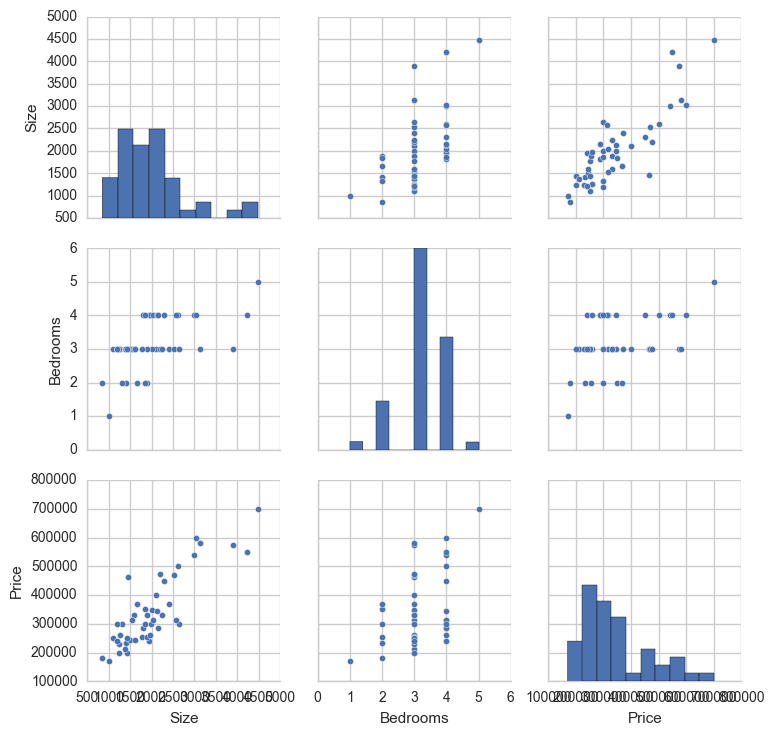

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Size', 'Bedrooms', 'Price']
sns.pairplot(data2[cols], size=2.5)
plt.show()

### Exercise 4-1
Based on the visuals above, how would you describe the data? Write a short paragraph describing the data.

## Use Size as the Key Variable

Paradoxically, to demostrate how multivariate non-linear regression works, we'll strip down our original dataset into one that just has Size and Price; the Bedrooms part of the data is removed. This simplifies things so that we can easily visualize what's going on.

So, to visualize things more easily, we're going to focus just on the sinlge variable -- the size of the house. We'll turn this into a multi-variable situation in just a bit.

In [5]:
# Just checking on the type of object data2 is ... in case you've forgotten
type(data2)

pandas.core.frame.DataFrame

In [6]:
# First drop the Bedrooms column from the data set -- we're not going to be using it for the rest of this notebook
data3 = data2.drop('Bedrooms', axis = 1)
data3.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


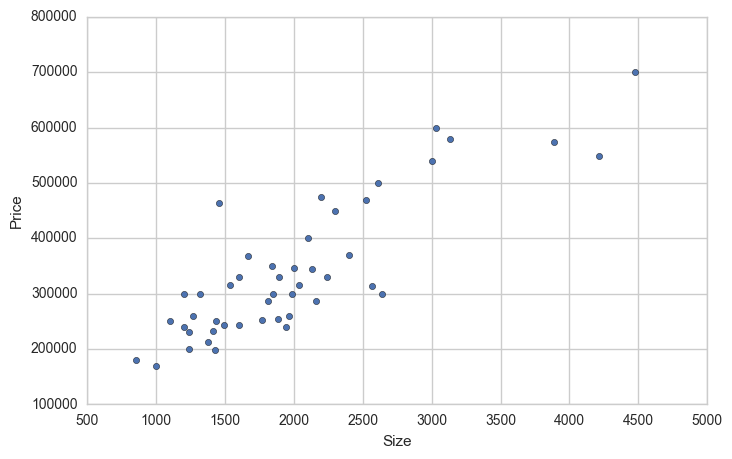

In [7]:
# Visualize this simplified data set
data3.plot.scatter(x='Size', y='Price', figsize=(8,5))

## How Polynomials Fit the Data

Let's visualize the fit for various degrees of polynomial functions.

In [8]:
# Because Price is about 100 times Size, first normalize the data
data3Norm = (data3 - data3.mean()) / data3.std()
data3Norm.head()

,Size,Price
0,0.130010,0.475747
1,-0.504190,-0.084074
2,0.502476,0.228626
3,-0.735723,-0.867025
4,1.257476,1.595389


[-2, 4, -1.5, 3]

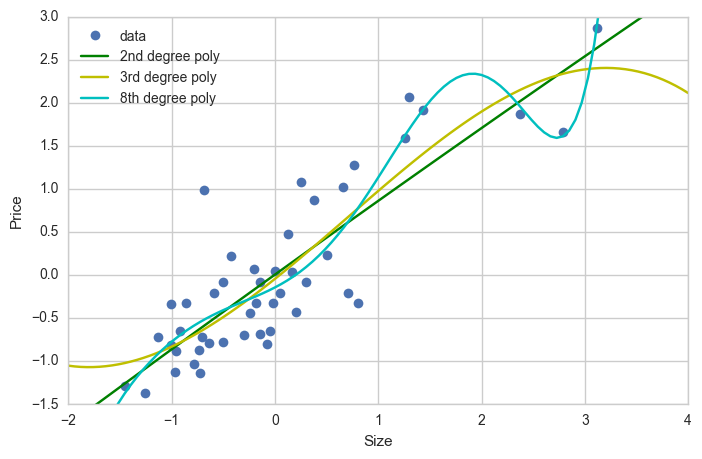

In [10]:
X = data3Norm['Size']
y = data3Norm['Price']

# fit the data with a 2nd degree polynomial
z2 = np.polyfit(X, y, 2) 
p2 = np.poly1d(z2) # construct the polynomial (note: that's a one in "poly1d")

# fit the data with a 3rd degree polynomial
z3 = np.polyfit(X, y, 3) 
p3 = np.poly1d(z3) # construct the polynomial

# fit the data with a 4th degree polynomial
z4 = np.polyfit(X, y, 4) 
p4 = np.poly1d(z4) # construct the polynomial

# fit the data with a 8th degree polynomial - just for the heck of it :-)
z8 = np.polyfit(X, y, 8) 
p8 = np.poly1d(z8) # construct the polynomial

# fit the data with a 16th degree polynomial - just for the heck of it :-)
z16 = np.polyfit(X, y, 16) 
p16 = np.poly1d(z16) # construct the polynomial

xx = np.linspace(-2, 4, 100)
plt.figure(figsize=(8,5))
plt.plot(X, y, 'o', label='data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(xx, p2(xx), 'g-', label='2nd degree poly')
plt.plot(xx, p3(xx), 'y-', label='3rd degree poly')
#plt.plot(xx, p4(xx), 'r-', label='4th degree poly')
plt.plot(xx, p8(xx), 'c-', label='8th degree poly')
#plt.plot(xx, p16(xx), 'm-', label='16th degree poly')
plt.legend(loc=2)
plt.axis([-2,4,-1.5,3]) # Use for higher degrees of polynomials

## Steps 1 and 2: Define the Inputs and the Outputs

In [11]:
# Add a column of 1s to the X input (keeps the notation simple)
data3Norm.insert(0,'x0',1)
data3Norm.head()

,x0,Size,Price
0,1,0.130010,0.475747
1,1,-0.504190,-0.084074
2,1,0.502476,0.228626
3,1,-0.735723,-0.867025
4,1,1.257476,1.595389


In [12]:
data3Norm.insert(2,'Size^2', np.power(data3Norm['Size'],2))
data3Norm.head()

,x0,Size,Size^2,Price
0,1,0.130010,0.016903,0.475747
1,1,-0.504190,0.254207,-0.084074
2,1,0.502476,0.252482,0.228626
3,1,-0.735723,0.541288,-0.867025
4,1,1.257476,1.581246,1.595389


In [13]:
data3Norm.insert(3,'Size^3', np.power(data3Norm['Size'],3))
data3Norm.head()

,x0,Size,Size^2,Size^3,Price
0,1,0.130010,0.016903,0.002198,0.475747
1,1,-0.504190,0.254207,-0.128169,-0.084074
2,1,0.502476,0.252482,0.126866,0.228626
3,1,-0.735723,0.541288,-0.398238,-0.867025
4,1,1.257476,1.581246,1.988379,1.595389


In [14]:
data3Norm.insert(4,'Size^4', np.power(data3Norm['Size'],4))
data3Norm.head()

,x0,Size,Size^2,Size^3,Size^4,Price
0,1,0.130010,0.016903,0.002198,0.000286,0.475747
1,1,-0.504190,0.254207,-0.128169,0.064621,-0.084074
2,1,0.502476,0.252482,0.126866,0.063747,0.228626
3,1,-0.735723,0.541288,-0.398238,0.292993,-0.867025
4,1,1.257476,1.581246,1.988379,2.500339,1.595389


We now have 4 input variables -- they're various powers of the one input variable we started with. 

In [15]:
X3 = data3Norm.iloc[:, 0:5]
y3 = data3Norm.iloc[:, 5]

## Step 3: Define the Model

We're going to turn this one (dependent) variable data set consisting of Size values into a dataset that will be represented by a multi-variate, polynomial model. First let's define the kind of model we're interested in. In the expressions below $x$ represents the Size of a house and the model is saying that the price of the house is a polynomial function of size.

Here's a second-degree polynomial model:
Model p2 = $h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x + \theta_{2}x^{2}$

Here's a third-degree polynomial model:
Model p3 = $h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x + \theta_{2}x^{2} + \theta_{3}x^3$

And here's a fourth-degree polynomial model:
Model p4 = $h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x + \theta_{2}x^{2} + \theta_{3}x^3 + \theta_{4}x^4$

Our models are more complicated than before, but $h_{\theta}(x)$ is still the same calculation as before because our inputs have been transformed to represent $x^{2}$, $x^{3}$, and $x^{4}$.

We'll use Model p4 for the rest of the calculations. It's a legitimate question to ask *how to decide* which model choose. We'll answer that question a few chapters later.         

## Step 4: Define the Parameters of the Model
$\theta_{0}$, $\theta_{1}$, $\theta_{2}$, $\theta_{3}$, and $\theta_{4}$ are the *parameters* of the model. Unlike our example of the boiling water in Chapter 1, these parameters can each take on an infinite number of values. $\theta_{0}$ is called the *bias value*.

With this model, we know exactly how to transform an input into an output -- that is, once the values of the parameters are given.

Let's pick a value of X from the dataset, fix specific values for $\theta_{0}$, $\theta_{1}$, $\theta_{2}$, $\theta_{3}$, and $\theta_{4}$, and see what we get for the value of y.

Specifically, let
$\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\theta_{3} \\
\theta_{4}
\end{bmatrix} = 
\begin{bmatrix}
-10 \\
1 \\
0 \\
5 \\
-1
\end{bmatrix}$

This means $\theta_{0}$ is -10, $\theta_{1}$ is 1, and so on.

Let's try out X * $\theta$ for the first few rows of X.

In [16]:
# Outputs generated by our model for the first 5 inputs with the specific theta values below
theta_test = np.matrix('-10;1;0;5;-1')
outputs = np.matrix(X3.iloc[0:5, :]) * theta_test
outputs

matrix([[ -9.85928833],
        [-11.20965516],
        [ -8.92693861],
        [-13.01990813],
        [ -1.30096852]])

In [17]:
# Compare with the first few values of the output
y3.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

That's quite a bit off from the actual values; so we know that the values for $\theta$ in theta_test must be quite far from the optimal values for $\theta$ -- the values that will minimize the cost of getting it wrong.

## Step 5: Define the Cost of Getting it Wrong
Our cost function is exactly the same as it was before for the single variable case. 

The cost of getting it wrong is defined as a function $J(\theta)$:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}x^{(i)}) - y^{(i)})^2$$

The only difference from what we had before is the addition of the various $\theta$s and $x$s

$$h_{\theta}(X) = \theta_{0} * x_{0}\ +\ \theta_{1} * x_{1} +\ \theta_{2} * x_{2} +\ \theta_{3} * x_{3} +\ \theta_{4} * x_{4}$$

where $x_{2} = x_{1}^{2}$, $x_{3} = x_{1}^{3}$, and $x_{4} = x_{1}^{4}$.

In [18]:
# Compute the cost for a given set of theta values over the entire dataset
# Get X and y in to matrix form
computeCost(np.matrix(X3.values), np.matrix(y3.values), theta_test)

5982.1359608963376

We don't know yet if this is high or low -- we'll have to try out a whole bunch of $\theta$ values. Or better yet, we can use pick an iterative method and implement it.

## Steps 6 and 7: Pick an Iterative Method to Minimize the Cost of Getting it Wrong and Implement It
Once again, the method that will "learn" the optimal values for $\theta$ is gradient descent. We don't have to do a thing to the function we wrote before for gradient descent. Let's use it to find the minimum cost and the values of $\theta$ that result in that minimum cost.

In [19]:
theta_init = np.matrix('-1;0;1;0;-1')
# Run gradient descent for a number of different learning rates
alpha = 0.00001
iters = 5000

theta_opt, cost_min = gradientDescent(np.matrix(X3.values), np.matrix(y3.values), theta_init, alpha, iters)
    

In [20]:
# This is the value of theta for the last iteration above -- hence for alpha = 0.1
theta_opt

matrix([[-0.47452231],
        [-0.13783401],
        [ 0.71951195],
        [ 0.0576498 ],
        [-0.09134312]])

In [21]:
# The minimum cost
cost_min[-1]

26.883851764021568

## Step 8: The Results
Let's make some predictions based on the values of $\theta_{opt}$.

In [22]:
size = 2
size_nonnorm = (size * data3.std()[0]) + data3.mean()[0]
price = (theta_opt[0] * 1) + (theta_opt[1] * size) + (theta_opt[2] * np.power(size,2)) + (theta_opt[3] * np.power(size,3)) + (theta_opt[4] * np.power(size,4))

In [23]:
price[0,0]

1.1275658774646542

In [24]:
# Transform the price into the real price (not normalized)
price_mean = data3.mean()[1]

In [25]:
price_std = data3.std()[1]

In [26]:
price_pred = (price[0,0] * price_std) + price_mean

In [27]:
price_pred

481403.38366970059

In [28]:
size_nonnorm

3590.0855581316091